In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import time
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


In [3]:
## 设置字符集
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
## 拦截异常
warnings.filterwarnings(action= 'ignore',category=ConvergenceWarning)



In [4]:
path = 'datas/crx.data'

In [5]:
pd.read_csv(path,header = None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [6]:
## 加载数据并对数据进行预处理
names = ['A' + str(i) for i in np.arange(1,17)]

In [7]:
df = pd.read_csv(path, names = names)
print(len(df))

690


In [8]:
df = df.replace('?',np.nan).dropna(how='any')
print(len(df))
print(df.info())
df


653
<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
A1     653 non-null object
A2     653 non-null object
A3     653 non-null float64
A4     653 non-null object
A5     653 non-null object
A6     653 non-null object
A7     653 non-null object
A8     653 non-null float64
A9     653 non-null object
A10    653 non-null object
A11    653 non-null int64
A12    653 non-null object
A13    653 non-null object
A14    653 non-null object
A15    653 non-null int64
A16    653 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.7+ KB
None


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [9]:
#TODO 查看显示数据类型的取值
df['A2'].value_counts

<bound method IndexOpsMixin.value_counts of 0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
5      32.08
6      33.17
7      22.92
8      54.42
9      42.50
10     22.08
11     29.92
12     38.25
13     48.08
14     45.83
15     36.67
16     28.25
17     23.25
18     21.83
19     19.17
20     25.00
21     23.25
22     47.75
23     27.42
24     41.17
25     15.83
26     47.00
27     56.58
28     57.42
29     42.08
       ...  
659    28.58
660    22.25
661    29.83
662    23.50
663    32.08
664    31.08
665    31.83
666    21.75
667    17.92
668    30.33
669    51.83
670    47.17
671    25.83
672    50.25
674    37.33
675    41.58
676    30.58
677    19.42
678    17.92
679    20.08
680    19.50
681    27.83
682    17.08
683    36.42
684    40.58
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: A2, Length: 653, dtype: object>

In [10]:
df['A16'].value_counts()

-    357
+    296
Name: A16, dtype: int64

In [11]:
#自定义哑编码方式
def parse(str0, str_list):
    return [1 if str0 == istr else 0 for istr in str_list]

#哑编码 将数据类型为str的类型映射成数组
parse
print(parse('v', ['v', 'y', 'z']))


#将本应该是数值类型的数据转化为数值类型
# 如 A2, A3, A8, A14, A15
# 其中A2，A14在原始数据中被处理成object，需要转化为float
type(df['A2'])

def stransfStr2float(name):
#     print(pd.Series([float(idata) for idata in df[name]]))
    return pd.DataFrame([float(idata) for idata in df[name]],columns=[name])

df[['A2','A3','A8', 'A14','A15']] = df[['A2','A3','A8', 'A14','A15']].astype(float) 



[1, 0, 0]


In [12]:
# 将str类型转化为数值型

df_new = pd.DataFrame()

def stransfStr2NumArr(name):
    if type(df[name][0]) is str:
        values = df[name].value_counts().index
        datas = [parse(value, values) for value in df[name]]
        namelist = [name + '_' + str(index) for index in np.arange(len(values))]
        return pd.DataFrame(datas,columns=namelist)
    else:
        return stransfStr2float(name)


for name in names:
    df_new = pd.concat([df_new, stransfStr2NumArr(name)],axis = 1)
    
datas = df_new
datas
# 终于特么的拼接起来了。。。

,A1_0,A1_1,A2,A3,A4_0,A4_1,A4_2,A5_0,A5_1,A5_2,...,A11,A12_0,A12_1,A13_0,A13_1,A13_2,A14,A15,A16_0,A16_1
0,1,0,30.83,0.000,1,0,0,1,0,0,...,1.0,1,0,1,0,0,202.0,0.0,0,1
1,0,1,58.67,4.460,1,0,0,1,0,0,...,6.0,1,0,1,0,0,43.0,560.0,0,1
2,0,1,24.50,0.500,1,0,0,1,0,0,...,0.0,1,0,1,0,0,280.0,824.0,0,1
3,1,0,27.83,1.540,1,0,0,1,0,0,...,5.0,0,1,1,0,0,100.0,3.0,0,1
4,1,0,20.17,5.625,1,0,0,1,0,0,...,0.0,1,0,0,1,0,120.0,0.0,0,1
5,1,0,32.08,4.000,1,0,0,1,0,0,...,0.0,0,1,1,0,0,360.0,0.0,0,1
6,1,0,33.17,1.040,1,0,0,1,0,0,...,0.0,0,1,1,0,0,164.0,31285.0,0,1
7,0,1,22.92,11.585,1,0,0,1,0,0,...,0.0,1,0,1,0,0,80.0,1349.0,0,1
8,1,0,54.42,0.500,0,1,0,0,1,0,...,0.0,1,0,1,0,0,180.0,314.0,0,1
9,1,0,42.50,4.915,0,1,0,0,1,0,...,0.0,0,1,1,0,0,52.0,1442.0,0,1


In [13]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 48 columns):
A1_0     653 non-null int64
A1_1     653 non-null int64
A2       653 non-null float64
A3       653 non-null float64
A4_0     653 non-null int64
A4_1     653 non-null int64
A4_2     653 non-null int64
A5_0     653 non-null int64
A5_1     653 non-null int64
A5_2     653 non-null int64
A6_0     653 non-null int64
A6_1     653 non-null int64
A6_2     653 non-null int64
A6_3     653 non-null int64
A6_4     653 non-null int64
A6_5     653 non-null int64
A6_6     653 non-null int64
A6_7     653 non-null int64
A6_8     653 non-null int64
A6_9     653 non-null int64
A6_10    653 non-null int64
A6_11    653 non-null int64
A6_12    653 non-null int64
A6_13    653 non-null int64
A7_0     653 non-null int64
A7_1     653 non-null int64
A7_2     653 non-null int64
A7_3     653 non-null int64
A7_4     653 non-null int64
A7_5     653 non-null int64
A7_6     653 non-null int64
A7_7     653 non-null i

In [14]:
## 3 数据分割
new_names = datas.columns
X = datas[new_names[0:-2]]
Y = datas[new_names[-1]]


In [15]:
## 数据分割
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 1)
print(X_test.head(10))
X_train.describe().T
# Y_train.describe().T

     A1_0  A1_1     A2      A3  A4_0  A4_1  A4_2  A5_0  A5_1  A5_2   ...    \
467     1     0  39.25   9.500     1     0     0     1     0     0   ...     
442     0     1  27.58   3.000     1     0     0     1     0     0   ...     
594     0     1  19.58   0.665     1     0     0     1     0     0   ...     
460     1     0  34.67   1.080     1     0     0     1     0     0   ...     
41      1     0  28.92  15.000     1     0     0     1     0     0   ...     
600     1     0  18.17   2.460     1     0     0     1     0     0   ...     
453     1     0  23.58   0.835     1     0     0     1     0     0   ...     
248     0     1  20.75   9.540     1     0     0     1     0     0   ...     
519     1     0  33.17   1.000     1     0     0     1     0     0   ...     
23      0     1  27.42  14.500     1     0     0     1     0     0   ...     

     A10_0  A10_1   A11  A12_0  A12_1  A13_0  A13_1  A13_2    A14     A15  
467      0      1  14.0      1      0      1      0      0  240.0

,count,mean,std,min,25%,50%,75%,max
A1_0,489.0,0.678937,0.467363,0.00,0.000,1.00,1.000,1.00
A1_1,489.0,0.321063,0.467363,0.00,0.000,0.00,1.000,1.00
A2,489.0,31.879223,12.454923,15.17,22.500,28.25,39.080,74.83
A3,489.0,4.882515,4.943524,0.00,1.000,3.00,7.625,28.00
A4_0,489.0,0.768916,0.421958,0.00,1.000,1.00,1.000,1.00
A4_1,489.0,0.229039,0.420645,0.00,0.000,0.00,0.000,1.00
A4_2,489.0,0.002045,0.045222,0.00,0.000,0.00,0.000,1.00
A5_0,489.0,0.768916,0.421958,0.00,1.000,1.00,1.000,1.00
A5_1,489.0,0.229039,0.420645,0.00,0.000,0.00,0.000,1.00
A5_2,489.0,0.002045,0.045222,0.00,0.000,0.00,0.000,1.00


In [16]:
## 4.数据归一化
ss = StandardScaler()
X_train = ss.fit_transform(X_train)   ## 训练正则模型，并将训练数据进行归一化操作
X_test = ss.transform(X_test) ##使用训练好的模型对测试数据进行归一化操作
pd.DataFrame(X_train).describe().T

,count,mean,std,min,25%,50%,75%,max
0,489.0,6.220882e-17,1.001024,-1.454184,-1.454184,0.687671,0.687671,0.687671
1,489.0,-6.220882e-17,1.001024,-0.687671,-0.687671,-0.687671,1.454184,1.454184
2,489.0,-1.112493e-17,1.001024,-1.342950,-0.753825,-0.291687,0.578739,3.452029
3,489.0,-1.770908e-17,1.001024,-0.988670,-0.786178,-0.381194,0.555331,4.681106
4,489.0,1.271421e-17,1.001024,-1.824125,0.548208,0.548208,0.548208,0.548208
5,489.0,1.294125e-16,1.001024,-0.545053,-0.545053,-0.545053,-0.545053,1.834686
6,489.0,-2.544261e-16,1.001024,-0.045268,-0.045268,-0.045268,-0.045268,22.090722
7,489.0,1.271421e-17,1.001024,-1.824125,0.548208,0.548208,0.548208,0.548208
8,489.0,1.294125e-16,1.001024,-0.545053,-0.545053,-0.545053,-0.545053,1.834686
9,489.0,-2.544261e-16,1.001024,-0.045268,-0.045268,-0.045268,-0.045268,22.090722


In [17]:
## 归一化操作完毕
## 分类模型构造
##  构建Logstic算法模型,
## Logisticregression中，参数的一些说明:
## Cs ->表示惩项罚项系数的可选范围
## fit_intercept -> 表示模型有无截距
## penalty ->表示惩罚方式， 即使用何种方式进行正则化的操作(l1或者l2)
lr = LogisticRegressionCV(Cs = np.logspace(-4,1,50), fit_intercept=True, penalty='l2', solver='lbfgs', tol=0.01, multi_class='ovr')
lr.fit(X_train, Y_train)

LogisticRegressionCV(Cs=array([1.00000e-04, 1.26486e-04, 1.59986e-04, 2.02359e-04, 2.55955e-04,
       3.23746e-04, 4.09492e-04, 5.17947e-04, 6.55129e-04, 8.28643e-04,
       1.04811e-03, 1.32571e-03, 1.67683e-03, 2.12095e-03, 2.68270e-03,
       3.39322e-03, 4.29193e-03, 5.42868e-03, 6.86649e-03, 8.68511e-03,
       1...., 2.44205e+00, 3.08884e+00,
       3.90694e+00, 4.94171e+00, 6.25055e+00, 7.90604e+00, 1.00000e+01]),
           class_weight=None, cv=None, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.01, verbose=0)

In [19]:
## Logistic算法效果输出
lr_r = lr.score(X_train, Y_train)
print('Logistic 算法的R值(训练集上的准确率):',lr_r)
print('Logistic 算法稀疏化特征比率:%.2f%%' %(np.mean(lr.coef_.ravel() == 0)*100))
print('Logistic 算法参数',lr.coef_)
print('Logistic 算法的截距',lr.intercept_)

Logistic 算法的R值(训练集上的准确率): 0.8813905930470347
Logistic 算法稀疏化特征比率:0.00%
Logistic 算法参数 [[ 0.00757551 -0.00757551  0.0660876   0.03340422  0.04839393 -0.05447872
   0.05519475  0.04839393 -0.05447872  0.05519475  0.01967615  0.03751154
   0.02160524 -0.07757181 -0.03078085 -0.11512437 -0.07124658  0.08274425
  -0.01399449  0.14402573  0.01308269  0.02734318 -0.02153759 -0.01153974
  -0.02001186  0.0933721  -0.09711281 -0.01906788  0.02057385 -0.01898705
   0.00893818  0.0598642  -0.0195308   0.15721388  0.45611238 -0.45611238
  -0.12983551  0.12983551  0.18951532 -0.01117318  0.01117318  0.00688887
  -0.00322289 -0.02246435 -0.05636043  0.1364243 ]]
Logistic 算法的截距 [-0.20626006]


In [24]:
#预测所属类别
result_predict = lr.predict(X_test)
result_predict_prob = lr.predict_proba(X_test)
print(result_predict)
print(result_predict_prob)


[1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1
 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0]
[[0.14268806 0.85731194]
 [0.74212648 0.25787352]
 [0.83455187 0.16544813]
 [0.83703994 0.16296006]
 [0.12339778 0.87660222]
 [0.49091188 0.50908812]
 [0.84116612 0.15883388]
 [0.87239065 0.12760935]
 [0.13542296 0.86457704]
 [0.13433492 0.86566508]
 [0.38260152 0.61739848]
 [0.30045617 0.69954383]
 [0.8962134  0.1037866 ]
 [0.33585086 0.66414914]
 [0.79430621 0.20569379]
 [0.15395273 0.84604727]
 [0.20165551 0.79834449]
 [0.90140168 0.09859832]
 [0.25720318 0.74279682]
 [0.69463468 0.30536532]
 [0.25011327 0.74988673]
 [0.13083084 0.86916916]
 [0.83940695 0.16059305]
 [0.81643608 0.18356392]
 [0.37437158 0.62562842]
 [0.32879114 0.67120886]
 [0.87842531 0.1

In [30]:
## KNN算法构建
knn = KNeighborsClassifier(n_neighbors=20, algorithm='kd_tree', weights='distance')
knn.fit(X_train, Y_train)
result_knn_predict = knn.predict(X_test)

print(knn.score(X_train, Y_train))


1.0


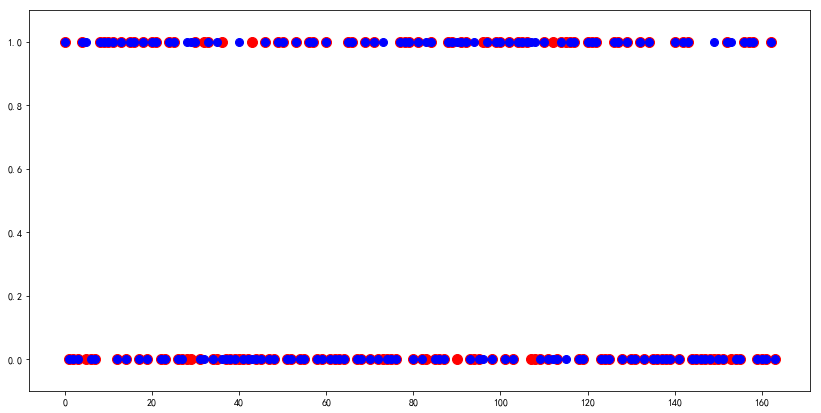

In [35]:
## 画图对比一下
x_len = range(len(X_test))

plt.figure(figsize=(14,7),facecolor='w')
plt.ylim(-0.1,1.1)
plt.plot(x_len, Y_test, 'ro', markersize = 10,label = 'Logistic预测值')
plt.plot(x_len, result_predict, 'bo', markersize = 8,label = 'Logistic预测值,$R^2$=%0.3f' % lr.score(X_test, Y_test))
# plt.plot(x_len, result_knn_predict, 'co', markersize=6, label='knn预测值, $R^2$=%0.3f' %knn.score(X_test, Y_test))


# plt.figure(figsize=(14,7), facecolor='w')
# plt.ylim(-0.1,1.1)
# plt.plot(x_len, Y_test, 'ro',markersize = 6, zorder=3, label=u'真实值')
# plt.plot(x_len, lr_y_predict, 'go', markersize = 10, zorder=2, label=u'Logis算法预测值,$R^2$=%.3f' % lr.score(X_test, Y_test))
# plt.plot(x_len, knn_y_predict, 'yo', markersize = 16, zorder=1, label=u'KNN算法预测值,$R^2$=%.3f' % knn.score(X_test, Y_test))
# plt.legend(loc = 'center right')
# plt.xlabel(u'数据编号', fontsize=18)
# plt.ylabel(u'是否审批(0表示通过，1表示通过)', fontsize=18)
# plt.title(u'Logistic回归算法和KNN算法对数据进行分类比较', fontsize=20)
plt.show()
